In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('./bank+marketing/bank/bank-full.csv', sep=';')
df.drop(columns=['month', 'day'], inplace=True)
df.drop_duplicates(inplace=True)

In [42]:
df.replace('unknown', np.nan, inplace=True)

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,198,1,-1,0,NaN,no


In [44]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
duration         0
campaign         0
pdays            0
previous         0
poutcome     36958
y                0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
# Handle missing values
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])
numeric_features = df.select_dtypes(include=[np.number])
num_imputer = SimpleImputer(strategy='mean')
df[numeric_features.columns] = num_imputer.fit_transform(numeric_features)

In [47]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [49]:
# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_features.drop('y')]))
categorical_encoded.columns = encoder.get_feature_names_out(categorical_features.drop('y'))
df = df.drop(columns=categorical_features.drop('y')).join(categorical_encoded)

In [50]:
df.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        1
job_entrepreneur       1
job_housemaid          1
job_management         1
job_retired            1
job_self-employed      1
job_services           1
job_student            1
job_technician         1
job_unemployed         1
marital_married        1
marital_single         1
education_secondary    1
education_tertiary     1
default_yes            1
housing_yes            1
loan_yes               1
contact_telephone      1
poutcome_other         1
poutcome_success       1
dtype: int64

In [51]:
# Handle missing values
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])
numeric_features = df.select_dtypes(include=[np.number])
num_imputer = SimpleImputer(strategy='mean')
df[numeric_features.columns] = num_imputer.fit_transform(numeric_features)

In [52]:
df.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
y                      0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
poutcome_other         0
poutcome_success       0
dtype: int64

In [53]:
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [54]:
# Encode target variable
y = LabelEncoder().fit_transform(df['y'])
df.drop(columns=['y'], inplace=True)

In [55]:
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [56]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [60]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import seaborn as sns

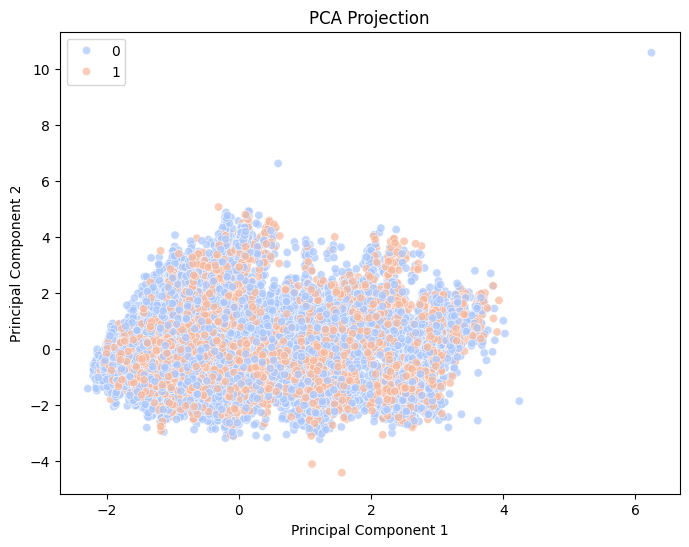

In [61]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

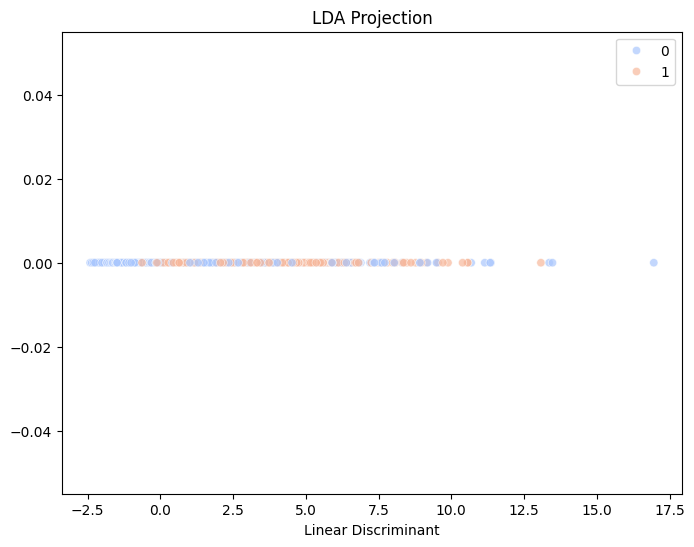

In [62]:
# Apply LDA for Dimensionality Reduction
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette='coolwarm', alpha=0.7)
plt.title("LDA Projection")
plt.xlabel("Linear Discriminant")
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
from sklearn.svm import SVC

In [67]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [70]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("SVM Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

SVM Model Performance:
Accuracy: 0.8889
Precision: 0.5917
Recall: 0.1616
F1 Score: 0.2539
Confusion Matrix:
[[7866  118]
 [ 887  171]]


In [71]:
import xgboost as xgb

In [72]:
# Convert the dataset into DMatrix format (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [73]:
# Define the parameters for the model
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': 3,  # 3 classes in the Iris dataset
    'eval_metric': 'merror',  # Metric to evaluate the performance
}

# Train the model
num_round = 50  # Number of boosting rounds
bst = xgb.train(params, dtrain, num_round)

In [74]:
# Make predictions
preds = bst.predict(dtest)

In [78]:
# Calculate metrics
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)

print("SVM Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}")
print(f"Precision: {precision * 100:.2f}")
print(f"Recall: {recall * 100:.2f}")
print(f"F1 Score: {f1 * 100:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

SVM Model Performance:
Accuracy: 89.28
Precision: 56.61
Recall: 36.01
F1 Score: 44.02
Confusion Matrix:
[[7692  292]
 [ 677  381]]
